## Plotting

In [1]:
from sympy import init_session
init_session(quiet=True)

In [2]:
expr = exp(sin(x**2+pi))
expr.series(x)

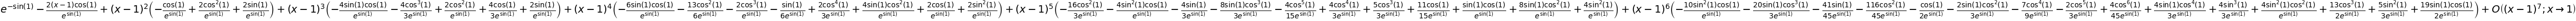

In [3]:
expr.series(x, 1, n=7)

Lets compare the original function with its series expansion visually

SymPy includes plotting functions, which are (by default) based on matplotlib (and also a legacy pyglet-based plotting...)

In [4]:
%matplotlib inline

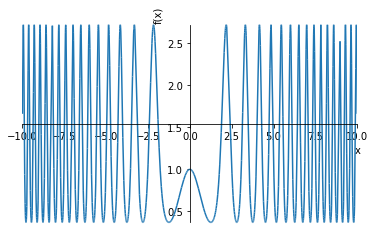

In [5]:
plot(expr);

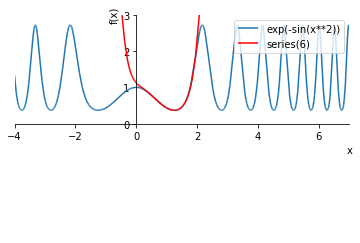

In [6]:
p1 = plot(expr, expr.series(x, 1, 7).removeO(), (x, -4, 7),
    ylim = (-3,3),
    show = False,
    legend = True
)
p1[1].line_color="r"
p1[1].label="series(6)"
p1.show()

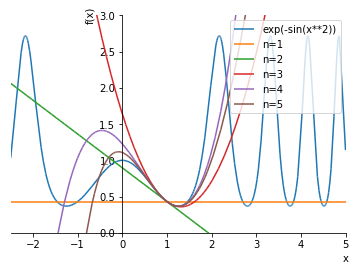

In [7]:
p0 = plot(expr, (x, -2.5, 5),
    ylim = (-0,3),
    show = False,
    legend = True
)
for n in range(1, 6):
    p1 = plot(expr.series(x, 1, n=n).removeO(), (x, -2.5, 5), show = False)
    p1[0].line_color = "C%d"%n
    p1[0].label = "n=%d"%(n,)
    p0.append(p1[0])
p0.show()

For more complicated plots I personally prefer to use matplotlib

In [8]:
import numpy as np
import matplotlib.pyplot as plt

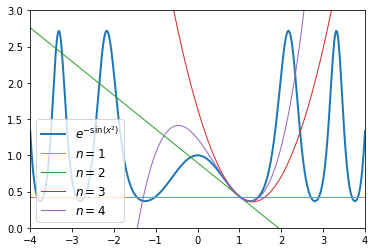

In [9]:
numexpr = lambdify(x, expr)
xpts = np.linspace(-4, 4, 500)
plt.plot(xpts, numexpr(xpts), label="$%s$"%latex(expr), lw=2)
for n in range(1, 5):
    plt.plot(xpts, lambdify(x, expr.series(x, 1, n=n).removeO())(xpts)*np.ones_like(xpts),
             c="C%d"%n, label="$n=%d$"%n, lw=1)
plt.ylim(0.0, 3)
plt.xlim(-4, 4)
plt.legend(loc="lower left", fontsize=12);

We have used the lambdify function, which turns a sympy expression into a numerical function (using numpy by default)

In [10]:
fun = lambdify(x, expr)

It is a numpy function...

In [11]:
import inspect
inspect.getsource(fun)

'def _lambdifygenerated(x):\n    return (exp(-sin(x**2)))\n'

3D plots are also supported

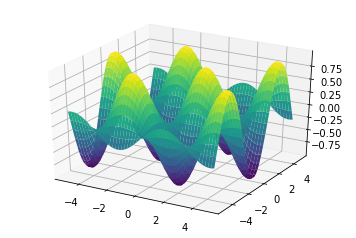

In [12]:
from sympy.plotting import plot3d, plot3d_parametric_surface
plot3d(sin(x)*cos(y), (x, -5, 5), (y, -5, 5));

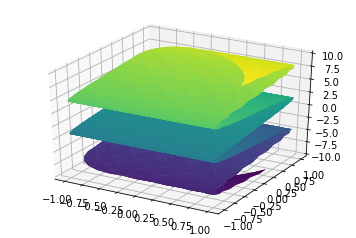

In [13]:
u, v = symbols('u v')
plot3d_parametric_surface(cos(u + v), sin(u - v), u - v, (u, -5, 5), (v, -5, 5));